<a href="https://colab.research.google.com/github/JimmyDevvvvv/Malware-Detection-ML-Model/blob/main/MaleWareML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up

In [19]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

# Load Dataset
malData = pd.read_csv("MalwareData.csv", sep="|", low_memory=False)

# Quick Overview of the Dataset
print(malData.head())
print(malData.shape)


           Name                               md5  Machine  \
0   memtest.exe  631ea355665f28d4707448e442fbf5b8      332   
1       ose.exe  9d10f99a6712e28f8acd5641e3a7ea6b      332   
2     setup.exe  4d92f518527353c0db88a70fddcfd390      332   
3      DW20.EXE  a41e524f8d45f0074fd07805ff0c9b12      332   
4  dwtrig20.exe  c87e561258f2f8650cef999bf643a731      332   

   SizeOfOptionalHeader  Characteristics  MajorLinkerVersion  \
0                   224              258                   9   
1                   224             3330                   9   
2                   224             3330                   9   
3                   224              258                   9   
4                   224              258                   9   

   MinorLinkerVersion  SizeOfCode  SizeOfInitializedData  \
0                   0      361984                 115712   
1                   0      130560                  19968   
2                   0      517120                 621568   
3 

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

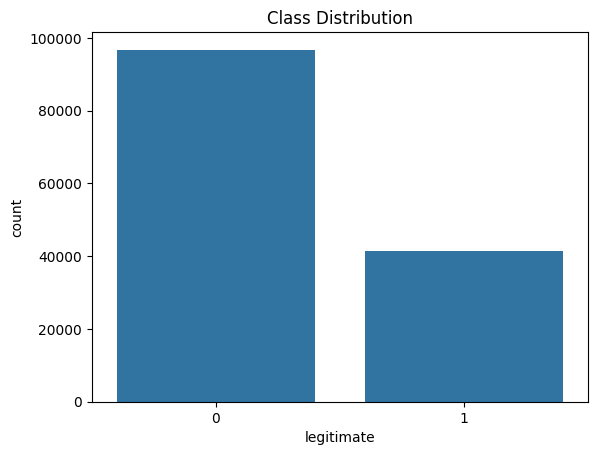

In [20]:
# Check for missing values
print(malData.isnull().sum())

# Drop irrelevant columns
malData = malData.drop(['Name', 'md5'], axis=1)

# Check class distribution
sns.countplot(x=malData['legitimate'])
plt.title("Class Distribution")
plt.show()


Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeapCommit               0
LoaderFlags                    0
NumberOfRv

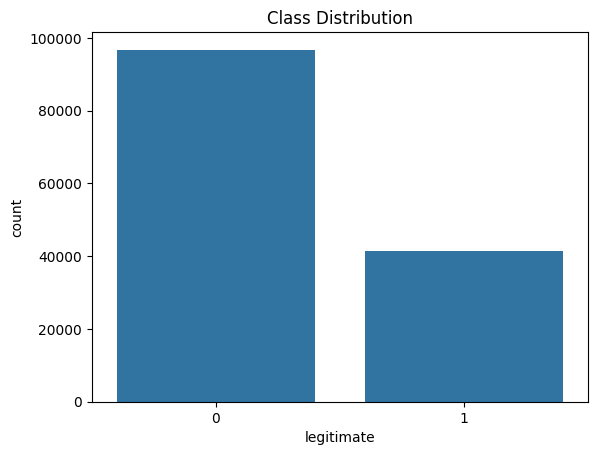

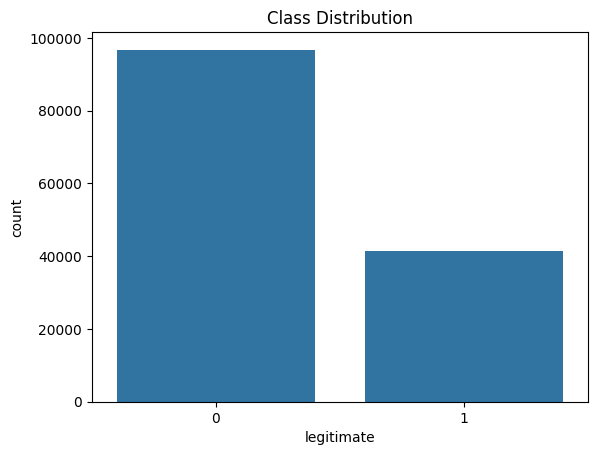

In [23]:
# Check for missing values
print(malData.isnull().sum())

# Drop irrelevant columns
# Check if columns exist before dropping
columns_to_drop = ['Name', 'md5']
existing_columns = malData.columns

for column in columns_to_drop:
    if column in existing_columns:
        malData = malData.drop([column], axis=1)
    else:
        print(f"Column '{column}' not found in DataFrame.")

# Check class distribution
sns.countplot(x=malData['legitimate'])
plt.title("Class Distribution")
plt.show()

# Check class distribution
sns.countplot(x=malData['legitimate'])
plt.title("Class Distribution")
plt.show()


In [22]:
# Split features and target
X = malData.drop(['legitimate'], axis=1)
y = malData['legitimate']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest F1 Score:", f1_score(y_test, rf_pred))


Random Forest Accuracy: 0.9953639985512496
Random Forest F1 Score: 0.9923536439665472


In [25]:
# Logistic Regression Model
lr_model = LogisticRegression(random_state=42, max_iter=500)
lr_model.fit(X_train_scaled, y_train)

# Evaluate Logistic Regression
lr_pred = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression F1 Score:", f1_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.9802969938428105
Logistic Regression F1 Score: 0.9673234022104757


In [26]:
# Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile Neural Network
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Neural Network
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate Neural Network
nn_pred = nn_model.predict(X_test_scaled)
nn_pred = (nn_pred > 0.5).astype(int)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))
print("Neural Network F1 Score:", f1_score(y_test, nn_pred))


Epoch 1/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9758 - loss: 0.0896
Epoch 2/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9886 - loss: 0.0376
Epoch 3/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9892 - loss: 0.0354
Epoch 4/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9899 - loss: 0.0308
Epoch 5/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9902 - loss: 0.0291
Epoch 6/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9908 - loss: 0.0262
Epoch 7/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9914 - loss: 0.0248
Epoch 8/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9912 - loss: 0.0249
Epoch 9/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9917 - loss: 0.0237
Epoch 10/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9922 - loss: 0.0220
863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network Accuracy: 0.9909815284317276
Neural Network F1 Score: 0.9851812

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19250
           1       0.99      0.99      0.99      8360

    accuracy                           1.00     27610
   macro avg       0.99      0.99      0.99     27610
weighted avg       1.00      1.00      1.00     27610

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     19250
           1       0.97      0.96      0.97      8360

    accuracy                           0.98     27610
   macro avg       0.98      0.98      0.98     27610
weighted avg       0.98      0.98      0.98     27610

Neural Network Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     19250
           1       0.98      0.99      0.99      8360

    accuracy                           0.99     27610
   macro avg       0.99      0.99      0.99     2761

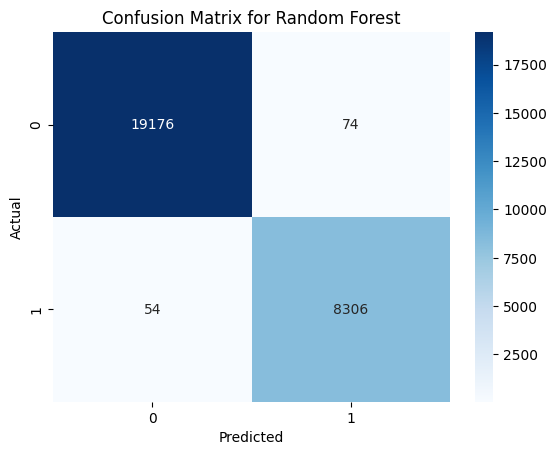

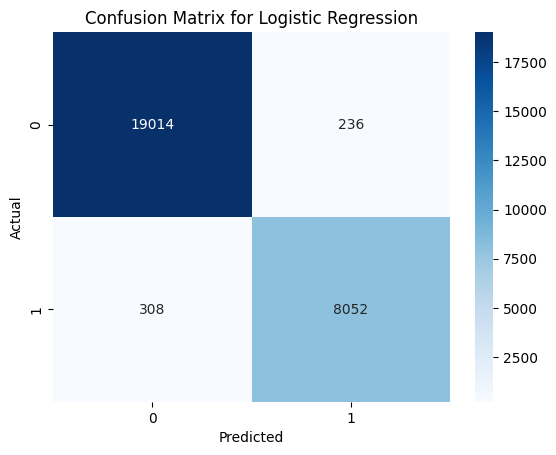

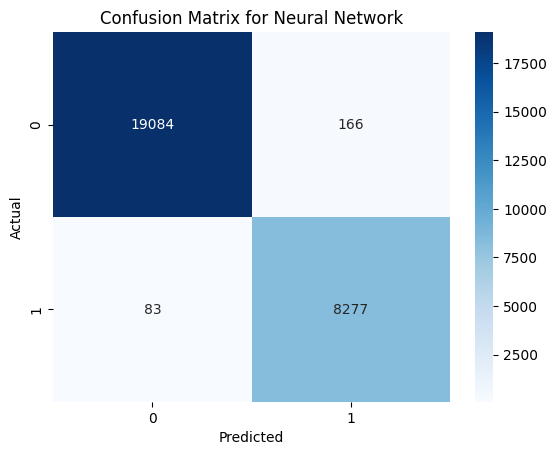

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

# Classification Reports
print("Random Forest Report:\n", classification_report(y_test, rf_pred))
print("Logistic Regression Report:\n", classification_report(y_test, lr_pred))
print("Neural Network Report:\n", classification_report(y_test, nn_pred))

# Plot Confusion Matrix for All Models
models = {"Random Forest": rf_pred, "Logistic Regression": lr_pred, "Neural Network": nn_pred}
for name, pred in models.items():
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
